In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.keras.layers import GRU, Dense, Input, SimpleRNN,LSTM

tf.compat.v1.enable_eager_execution()

In [2]:
%matplotlib inline
plt.style.use("ggplot")
# Seleccionamos una semilla para los RNG
tf.random.set_seed(1984)
np.random.seed(1984)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
class GruForcaster(Model):
    def __init__(self, m_recurrent, n_recurrent, activation, *args, **kwargs):
        super(GruForcaster, self).__init__(*args, **kwargs)
        self.recurrent_layer = m_recurrent(
            n_recurrent, activation=activation,
            return_sequences=False,
            recurrent_initializer="glorot_uniform"
            )
        self.output_layer = Dense(1, activation="linear")
    
    def call(self, inputs):
        intermediate = self.recurrent_layer(inputs)
        output = self.output_layer(intermediate)
        return output

In [4]:
def preprocess(BD):
    data = list(tf.constant(BD, dtype="float32"))  
    return tf.data.Dataset.from_tensor_slices(data).map(lambda seq: (tf.reshape(seq[:-1], (-1, 1)), seq[-1])).batch(64, drop_remainder=True)

# 

# Carga de Datos

In [5]:
Data=pd.read_csv('BDHumidity-processed.csv')
Data.head()

,Date,Time,TE-201,ME-202,TE-202,ME-203,TE-203,TE-302,ME-302,ME-304
0,2/2/2022,23:31:59,64.736267,90.818748,75.437927,82.206253,77.408661,77.328552,69.718750,77.474998
1,2/2/2022,23:32:59,61.988647,90.656250,72.553925,81.956253,76.960022,79.683807,69.168755,77.412498
2,2/2/2022,23:33:59,64.366730,90.387505,75.245666,81.818748,76.863892,77.056183,69.331253,77.625000
3,2/2/2022,23:34:59,63.659729,88.781250,74.460571,82.837502,77.600922,79.587677,69.050003,77.493752
4,2/2/2022,23:35:59,62.727783,88.781250,72.537903,82.868752,76.399261,77.536835,68.906250,77.525002


In [6]:
train,test = train_test_split(Data, test_size=0.3,ran)

In [7]:
Bm3 = train[['TE-201', 'ME-202', 'TE-202', 'ME-203', 'TE-203', 'TE-302','ME-302','ME-304']].values
Bm3Test = test[['TE-201', 'ME-202', 'TE-202', 'ME-203', 'TE-203', 'TE-302','ME-302','ME-304']].values

In [8]:
dataset3 = preprocess(Bm3)
dataset3Test = preprocess(Bm3Test)

# Modelo Long short-term memory

In [9]:
input_ = Input(shape=(7, 1))
output = GruForcaster(LSTM, 32, activation="relu")(input_)
model_LSTM = Model(input_, output)
model_LSTM.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 gru_forcaster (GruForcaster  (None, 1)                4385      
 )                                                               
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_LSTM.compile(loss="mse", optimizer=tf.optimizers.Adam(learning_rate=1e-4),metrics=[MeanAbsolutePercentageError()])
model_LSTM.fit(dataset3,epochs=300, validation_data=dataset3Test)

Epoch 1/300
453/453 [==============================] - 6s 10ms/step - loss: 2831.8601 - mean_absolute_percentage_error: 63.1432 - val_loss: 76.6341 - val_mean_absolute_percentage_error: 22.3559
Epoch 2/300
453/453 [==============================] - 4s 10ms/step - loss: 57.9023 - mean_absolute_percentage_error: 19.3206 - val_loss: 52.9692 - val_mean_absolute_percentage_error: 20.0546
Epoch 3/300
453/453 [==============================] - 4s 10ms/step - loss: 44.4494 - mean_absolute_percentage_error: 16.9602 - val_loss: 40.3466 - val_mean_absolute_percentage_error: 16.3757
Epoch 4/300
453/453 [==============================] - 5s 10ms/step - loss: 37.2836 - mean_absolute_percentage_error: 14.2146 - val_loss: 36.1176 - val_mean_absolute_percentage_error: 14.2012
Epoch 5/300
453/453 [==============================] - 4s 10ms/step - loss: 35.0378 - mean_absolute_percentage_error: 13.1048 - val_loss: 34.2396 - val_mean_absolute_percentage_error: 13.4207
Epoch 6/300
453/453 [=================

Epoch 44/300
453/453 [==============================] - 4s 10ms/step - loss: 15.7159 - mean_absolute_percentage_error: 7.2371 - val_loss: 16.0498 - val_mean_absolute_percentage_error: 7.4572
Epoch 45/300
453/453 [==============================] - 4s 10ms/step - loss: 15.5657 - mean_absolute_percentage_error: 7.1883 - val_loss: 15.8950 - val_mean_absolute_percentage_error: 7.4103
Epoch 46/300
453/453 [==============================] - 5s 10ms/step - loss: 15.4135 - mean_absolute_percentage_error: 7.1395 - val_loss: 15.7544 - val_mean_absolute_percentage_error: 7.3652
Epoch 47/300
453/453 [==============================] - 5s 10ms/step - loss: 15.2659 - mean_absolute_percentage_error: 7.0922 - val_loss: 15.6204 - val_mean_absolute_percentage_error: 7.3183
Epoch 48/300
453/453 [==============================] - 5s 10ms/step - loss: 15.1239 - mean_absolute_percentage_error: 7.0489 - val_loss: 15.4892 - val_mean_absolute_percentage_error: 7.2668
Epoch 49/300
453/453 [=======================

Epoch 87/300
453/453 [==============================] - 4s 9ms/step - loss: 11.5790 - mean_absolute_percentage_error: 5.8475 - val_loss: 12.4157 - val_mean_absolute_percentage_error: 5.8702
Epoch 88/300
453/453 [==============================] - 4s 10ms/step - loss: 11.5260 - mean_absolute_percentage_error: 5.8235 - val_loss: 12.3821 - val_mean_absolute_percentage_error: 5.8439
Epoch 89/300
453/453 [==============================] - 5s 10ms/step - loss: 11.4643 - mean_absolute_percentage_error: 5.8019 - val_loss: 12.3358 - val_mean_absolute_percentage_error: 5.8215
Epoch 90/300
453/453 [==============================] - 4s 10ms/step - loss: 11.4096 - mean_absolute_percentage_error: 5.7783 - val_loss: 12.3085 - val_mean_absolute_percentage_error: 5.8223
Epoch 91/300
453/453 [==============================] - 5s 10ms/step - loss: 11.3509 - mean_absolute_percentage_error: 5.7573 - val_loss: 12.2498 - val_mean_absolute_percentage_error: 5.7757
Epoch 92/300
453/453 [========================

Epoch 130/300
453/453 [==============================] - 4s 9ms/step - loss: 9.7337 - mean_absolute_percentage_error: 5.1432 - val_loss: 10.5766 - val_mean_absolute_percentage_error: 5.1996
Epoch 131/300
453/453 [==============================] - 4s 9ms/step - loss: 9.7037 - mean_absolute_percentage_error: 5.1323 - val_loss: 10.5533 - val_mean_absolute_percentage_error: 5.1886
Epoch 132/300
453/453 [==============================] - 4s 9ms/step - loss: 9.6770 - mean_absolute_percentage_error: 5.1228 - val_loss: 10.5334 - val_mean_absolute_percentage_error: 5.1793
Epoch 133/300
453/453 [==============================] - 4s 10ms/step - loss: 9.6489 - mean_absolute_percentage_error: 5.1094 - val_loss: 10.5064 - val_mean_absolute_percentage_error: 5.1666
Epoch 134/300
453/453 [==============================] - 4s 10ms/step - loss: 9.6211 - mean_absolute_percentage_error: 5.0995 - val_loss: 10.4830 - val_mean_absolute_percentage_error: 5.1589
Epoch 135/300
453/453 [=========================

453/453 [==============================] - 5s 10ms/step - loss: 8.8610 - mean_absolute_percentage_error: 4.8049 - val_loss: 9.8740 - val_mean_absolute_percentage_error: 4.7483
Epoch 174/300
453/453 [==============================] - 5s 10ms/step - loss: 8.8734 - mean_absolute_percentage_error: 4.8138 - val_loss: 9.8946 - val_mean_absolute_percentage_error: 4.7553
Epoch 175/300
453/453 [==============================] - 5s 10ms/step - loss: 8.8305 - mean_absolute_percentage_error: 4.7957 - val_loss: 9.8775 - val_mean_absolute_percentage_error: 4.7355
Epoch 176/300
453/453 [==============================] - 4s 9ms/step - loss: 8.8592 - mean_absolute_percentage_error: 4.8103 - val_loss: 9.9275 - val_mean_absolute_percentage_error: 4.7570
Epoch 177/300
453/453 [==============================] - 4s 9ms/step - loss: 8.8060 - mean_absolute_percentage_error: 4.7921 - val_loss: 9.8732 - val_mean_absolute_percentage_error: 4.7118
Epoch 178/300
453/453 [==============================] - 4s 9ms/st

453/453 [==============================] - 4s 9ms/step - loss: 8.3981 - mean_absolute_percentage_error: 4.5713 - val_loss: 10.2321 - val_mean_absolute_percentage_error: 4.6770
Epoch 217/300
453/453 [==============================] - 4s 10ms/step - loss: 8.3947 - mean_absolute_percentage_error: 4.5644 - val_loss: 10.1872 - val_mean_absolute_percentage_error: 4.6634
Epoch 218/300
453/453 [==============================] - 5s 10ms/step - loss: 8.3763 - mean_absolute_percentage_error: 4.5574 - val_loss: 10.2378 - val_mean_absolute_percentage_error: 4.6791
Epoch 219/300
453/453 [==============================] - 5s 10ms/step - loss: 8.3650 - mean_absolute_percentage_error: 4.5522 - val_loss: 10.1855 - val_mean_absolute_percentage_error: 4.6474
Epoch 220/300
453/453 [==============================] - 4s 10ms/step - loss: 8.3578 - mean_absolute_percentage_error: 4.5438 - val_loss: 10.2471 - val_mean_absolute_percentage_error: 4.6679
Epoch 221/300
453/453 [==============================] - 4s 

453/453 [==============================] - 4s 9ms/step - loss: 7.9483 - mean_absolute_percentage_error: 4.3315 - val_loss: 10.0143 - val_mean_absolute_percentage_error: 4.5224
Epoch 260/300
453/453 [==============================] - 4s 10ms/step - loss: 7.9426 - mean_absolute_percentage_error: 4.3297 - val_loss: 9.9352 - val_mean_absolute_percentage_error: 4.5016
Epoch 261/300
453/453 [==============================] - 4s 10ms/step - loss: 7.9295 - mean_absolute_percentage_error: 4.3241 - val_loss: 9.9002 - val_mean_absolute_percentage_error: 4.4939
Epoch 262/300
453/453 [==============================] - 4s 10ms/step - loss: 7.9172 - mean_absolute_percentage_error: 4.3203 - val_loss: 9.8734 - val_mean_absolute_percentage_error: 4.4877
Epoch 263/300
453/453 [==============================] - 4s 10ms/step - loss: 7.9123 - mean_absolute_percentage_error: 4.3133 - val_loss: 9.9131 - val_mean_absolute_percentage_error: 4.5047
Epoch 264/300
453/453 [==============================] - 4s 10ms

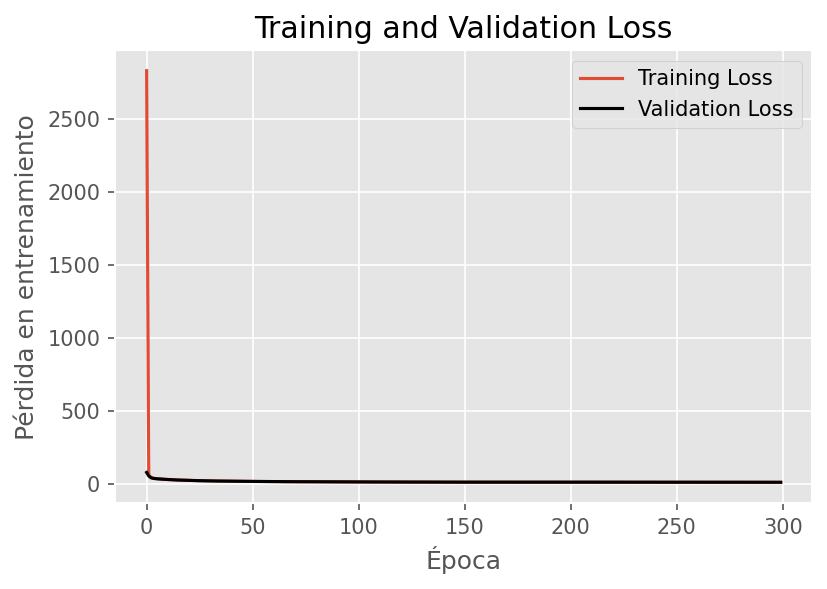

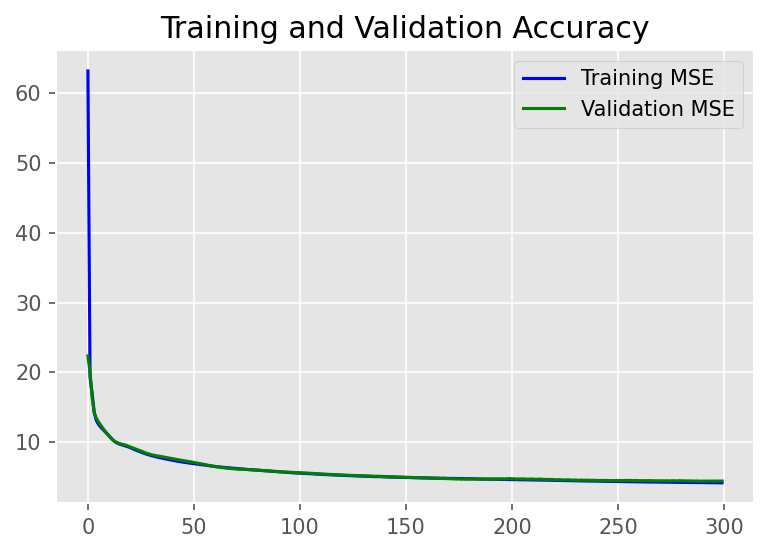

In [11]:
fig=plt.figure(dpi=150)
plt.plot(model_LSTM.history.history["loss"],label='Training Loss')
plt.plot(model_LSTM.history.history["val_loss"],'k',label='Validation Loss')
plt.legend()
plt.xlabel("Época"); plt.ylabel("Pérdida en entrenamiento")
plt.title('Training and Validation Loss')
plt.show()


fig=plt.figure(dpi=150)
epochs = range(1, len(model_LSTM.history.history['mean_absolute_percentage_error']) +1)
plt.plot(model_LSTM.history.history['mean_absolute_percentage_error'], 'b',label = 'Training MSE')
plt.plot(model_LSTM.history.history['val_mean_absolute_percentage_error'], 'g', label = 'Validation MSE')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [12]:
keras_model_path = "C:/temp/model_LSTM"
model_LSTM.save(keras_model_path)

INFO:tensorflow:Assets written to: C:/temp/model_LSTM\assets


# Modelo SimpleRNN

In [17]:
input_ = Input(shape=(7, 1))
output = GruForcaster(SimpleRNN, 32, activation="relu")(input_)
model_RNN = Model(input_, output)
model_RNN.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 gru_forcaster_1 (GruForcast  (None, 1)                1121      
 er)                                                             
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_RNN.compile(loss="mse", optimizer=tf.optimizers.Adam(learning_rate=1e-4),metrics=[MeanAbsolutePercentageError()])
model_RNN.fit(dataset3,epochs=300, validation_data=dataset3Test)

Epoch 1/300
453/453 [==============================] - 4s 7ms/step - loss: 169.2585 - mean_absolute_percentage_error: 29.2341 - val_loss: 82.9144 - val_mean_absolute_percentage_error: 26.9869
Epoch 2/300
453/453 [==============================] - 3s 7ms/step - loss: 77.2420 - mean_absolute_percentage_error: 24.7944 - val_loss: 79.3386 - val_mean_absolute_percentage_error: 25.9571
Epoch 3/300
453/453 [==============================] - 3s 7ms/step - loss: 73.6503 - mean_absolute_percentage_error: 23.8204 - val_loss: 75.3712 - val_mean_absolute_percentage_error: 24.8877
Epoch 4/300
453/453 [==============================] - 3s 7ms/step - loss: 70.0644 - mean_absolute_percentage_error: 22.8651 - val_loss: 71.7793 - val_mean_absolute_percentage_error: 23.9092
Epoch 5/300
453/453 [==============================] - 3s 7ms/step - loss: 66.7689 - mean_absolute_percentage_error: 22.0175 - val_loss: 68.3172 - val_mean_absolute_percentage_error: 23.0471
Epoch 6/300
453/453 [=======================

Epoch 44/300
453/453 [==============================] - 3s 7ms/step - loss: 32.5795 - mean_absolute_percentage_error: 12.1156 - val_loss: 31.6206 - val_mean_absolute_percentage_error: 12.7443
Epoch 45/300
453/453 [==============================] - 3s 7ms/step - loss: 32.5005 - mean_absolute_percentage_error: 12.0865 - val_loss: 31.5444 - val_mean_absolute_percentage_error: 12.7116
Epoch 46/300
453/453 [==============================] - 3s 7ms/step - loss: 32.4243 - mean_absolute_percentage_error: 12.0572 - val_loss: 31.4729 - val_mean_absolute_percentage_error: 12.6836
Epoch 47/300
453/453 [==============================] - 3s 7ms/step - loss: 32.3525 - mean_absolute_percentage_error: 12.0276 - val_loss: 31.4043 - val_mean_absolute_percentage_error: 12.6465
Epoch 48/300
453/453 [==============================] - 3s 7ms/step - loss: 32.2841 - mean_absolute_percentage_error: 12.0031 - val_loss: 31.3375 - val_mean_absolute_percentage_error: 12.6254
Epoch 49/300
453/453 [==================

Epoch 87/300
453/453 [==============================] - 3s 7ms/step - loss: 30.2331 - mean_absolute_percentage_error: 11.3370 - val_loss: 29.0870 - val_mean_absolute_percentage_error: 11.7790
Epoch 88/300
453/453 [==============================] - 3s 7ms/step - loss: 30.1903 - mean_absolute_percentage_error: 11.3244 - val_loss: 29.0344 - val_mean_absolute_percentage_error: 11.7652
Epoch 89/300
453/453 [==============================] - 3s 7ms/step - loss: 30.1439 - mean_absolute_percentage_error: 11.3066 - val_loss: 28.9906 - val_mean_absolute_percentage_error: 11.7449
Epoch 90/300
453/453 [==============================] - 3s 7ms/step - loss: 30.0861 - mean_absolute_percentage_error: 11.2855 - val_loss: 28.9389 - val_mean_absolute_percentage_error: 11.7141
Epoch 91/300
453/453 [==============================] - 3s 7ms/step - loss: 30.0398 - mean_absolute_percentage_error: 11.2720 - val_loss: 28.8846 - val_mean_absolute_percentage_error: 11.7149
Epoch 92/300
453/453 [==================

453/453 [==============================] - 3s 6ms/step - loss: 28.3962 - mean_absolute_percentage_error: 10.7491 - val_loss: 27.0686 - val_mean_absolute_percentage_error: 11.0387
Epoch 130/300
453/453 [==============================] - 3s 7ms/step - loss: 28.3461 - mean_absolute_percentage_error: 10.7343 - val_loss: 27.0299 - val_mean_absolute_percentage_error: 11.0404
Epoch 131/300
453/453 [==============================] - 3s 7ms/step - loss: 28.3116 - mean_absolute_percentage_error: 10.7198 - val_loss: 26.9802 - val_mean_absolute_percentage_error: 11.0128
Epoch 132/300
453/453 [==============================] - 3s 6ms/step - loss: 28.2602 - mean_absolute_percentage_error: 10.7103 - val_loss: 26.9371 - val_mean_absolute_percentage_error: 10.9992
Epoch 133/300
453/453 [==============================] - 3s 6ms/step - loss: 28.2206 - mean_absolute_percentage_error: 10.6953 - val_loss: 26.8962 - val_mean_absolute_percentage_error: 10.9890
Epoch 134/300
453/453 [==========================

453/453 [==============================] - 3s 7ms/step - loss: 26.6606 - mean_absolute_percentage_error: 10.3698 - val_loss: 25.2060 - val_mean_absolute_percentage_error: 10.5253
Epoch 172/300
453/453 [==============================] - 3s 7ms/step - loss: 26.6102 - mean_absolute_percentage_error: 10.3538 - val_loss: 25.1606 - val_mean_absolute_percentage_error: 10.5097
Epoch 173/300
453/453 [==============================] - 3s 7ms/step - loss: 26.5604 - mean_absolute_percentage_error: 10.3401 - val_loss: 25.1090 - val_mean_absolute_percentage_error: 10.4965
Epoch 174/300
453/453 [==============================] - 3s 6ms/step - loss: 26.5183 - mean_absolute_percentage_error: 10.3295 - val_loss: 25.0689 - val_mean_absolute_percentage_error: 10.4646
Epoch 175/300
453/453 [==============================] - 3s 6ms/step - loss: 26.4748 - mean_absolute_percentage_error: 10.3155 - val_loss: 25.0014 - val_mean_absolute_percentage_error: 10.4660
Epoch 176/300
453/453 [==========================

453/453 [==============================] - 3s 7ms/step - loss: 25.0876 - mean_absolute_percentage_error: 9.9219 - val_loss: 23.7587 - val_mean_absolute_percentage_error: 10.0194
Epoch 214/300
453/453 [==============================] - 3s 6ms/step - loss: 25.0565 - mean_absolute_percentage_error: 9.9124 - val_loss: 23.7338 - val_mean_absolute_percentage_error: 10.0166
Epoch 215/300
453/453 [==============================] - 3s 7ms/step - loss: 25.0243 - mean_absolute_percentage_error: 9.9079 - val_loss: 23.7025 - val_mean_absolute_percentage_error: 10.0025
Epoch 216/300
453/453 [==============================] - 3s 7ms/step - loss: 24.9993 - mean_absolute_percentage_error: 9.8985 - val_loss: 23.6710 - val_mean_absolute_percentage_error: 9.9757
Epoch 217/300
453/453 [==============================] - 3s 6ms/step - loss: 24.9659 - mean_absolute_percentage_error: 9.8879 - val_loss: 23.6429 - val_mean_absolute_percentage_error: 9.9772
Epoch 218/300
453/453 [==============================] -

Epoch 256/300
453/453 [==============================] - 3s 7ms/step - loss: 23.7761 - mean_absolute_percentage_error: 9.5945 - val_loss: 22.4565 - val_mean_absolute_percentage_error: 9.6036
Epoch 257/300
453/453 [==============================] - 3s 6ms/step - loss: 23.7480 - mean_absolute_percentage_error: 9.5966 - val_loss: 22.4273 - val_mean_absolute_percentage_error: 9.5935
Epoch 258/300
453/453 [==============================] - 3s 6ms/step - loss: 23.7142 - mean_absolute_percentage_error: 9.5822 - val_loss: 22.4123 - val_mean_absolute_percentage_error: 9.5670
Epoch 259/300
453/453 [==============================] - 3s 6ms/step - loss: 23.6876 - mean_absolute_percentage_error: 9.5748 - val_loss: 22.3718 - val_mean_absolute_percentage_error: 9.5507
Epoch 260/300
453/453 [==============================] - 3s 6ms/step - loss: 23.6608 - mean_absolute_percentage_error: 9.5667 - val_loss: 22.3410 - val_mean_absolute_percentage_error: 9.5452
Epoch 261/300
453/453 [======================

Epoch 299/300
453/453 [==============================] - 3s 6ms/step - loss: 22.6967 - mean_absolute_percentage_error: 9.2803 - val_loss: 21.3972 - val_mean_absolute_percentage_error: 9.2064
Epoch 300/300
453/453 [==============================] - 3s 6ms/step - loss: 22.6698 - mean_absolute_percentage_error: 9.2702 - val_loss: 21.3892 - val_mean_absolute_percentage_error: 9.1950


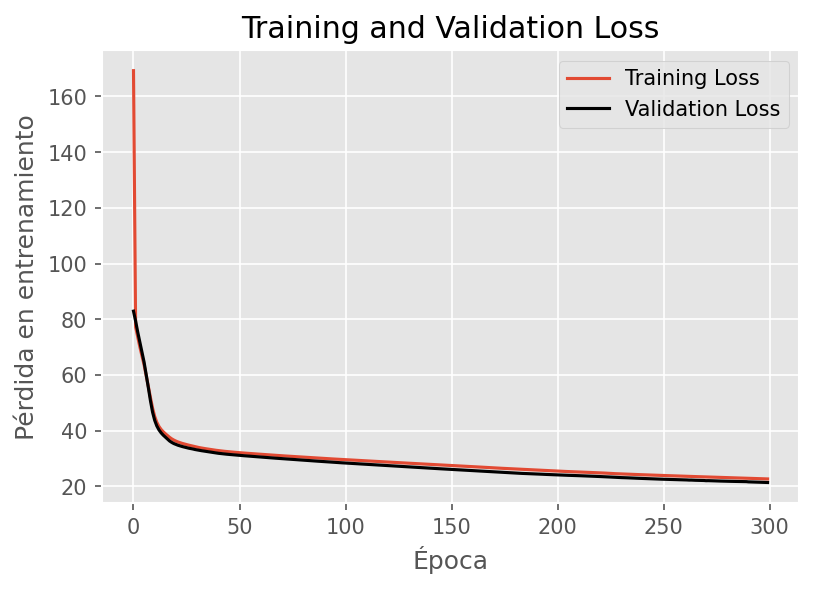

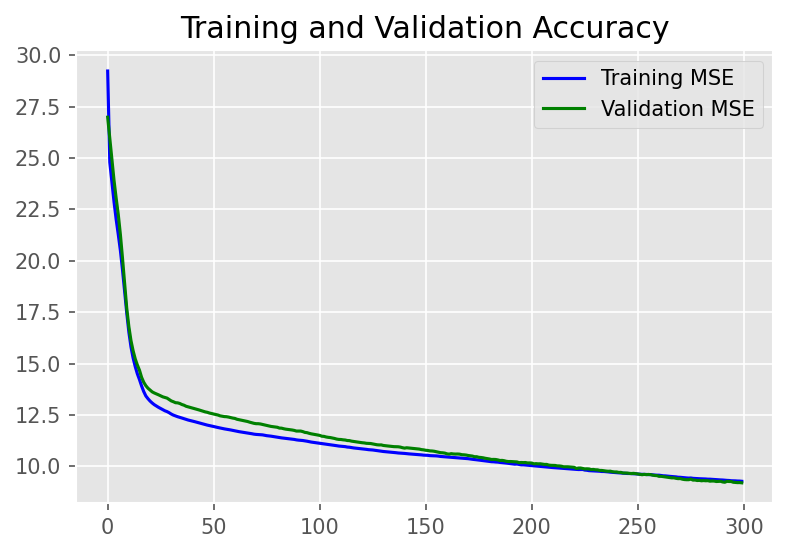

In [19]:
fig=plt.figure(dpi=150)
plt.plot(model_RNN.history.history["loss"],label='Training Loss')
plt.plot(model_RNN.history.history["val_loss"],'k',label='Validation Loss')
plt.legend()
plt.xlabel("Época"); plt.ylabel("Pérdida en entrenamiento")
plt.title('Training and Validation Loss')
plt.show()


fig=plt.figure(dpi=150)
epochs = range(1, len(model_RNN.history.history['mean_absolute_percentage_error']) +1)
plt.plot(model_RNN.history.history['mean_absolute_percentage_error'], 'b',label = 'Training MSE')
plt.plot(model_RNN.history.history['val_mean_absolute_percentage_error'], 'g', label = 'Validation MSE')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [20]:
keras_model_path = "C:/temp/model_RNN"
model_RNN.save(keras_model_path)

INFO:tensorflow:Assets written to: C:/temp/model_RNN\assets


INFO:tensorflow:Assets written to: C:/temp/model_RNN\assets


# Modelo Gated recurrent unit

In [21]:
input_ = Input(shape=(7, 1))
output = GruForcaster(GRU, 32, activation="relu")(input_)
model_GRU = Model(input_, output)
model_GRU.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 gru_forcaster_2 (GruForcast  (None, 1)                3393      
 er)                                                             
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_GRU.compile(loss="mse", optimizer=tf.optimizers.Adam(learning_rate=1e-4),metrics=[MeanAbsolutePercentageError()])
model_GRU.fit(dataset3,epochs=300, validation_data=dataset3Test)

Epoch 1/300
453/453 [==============================] - 5s 11ms/step - loss: 2389.7036 - mean_absolute_percentage_error: 64.6861 - val_loss: 82.6189 - val_mean_absolute_percentage_error: 27.6994
Epoch 2/300
453/453 [==============================] - 5s 10ms/step - loss: 65.5907 - mean_absolute_percentage_error: 22.5602 - val_loss: 60.0655 - val_mean_absolute_percentage_error: 21.7829
Epoch 3/300
453/453 [==============================] - 5s 10ms/step - loss: 55.6402 - mean_absolute_percentage_error: 19.4538 - val_loss: 55.3169 - val_mean_absolute_percentage_error: 19.9829
Epoch 4/300
453/453 [==============================] - 5s 11ms/step - loss: 52.2363 - mean_absolute_percentage_error: 18.4063 - val_loss: 51.3401 - val_mean_absolute_percentage_error: 18.9717
Epoch 5/300
453/453 [==============================] - 5s 11ms/step - loss: 48.9970 - mean_absolute_percentage_error: 17.8205 - val_loss: 48.0738 - val_mean_absolute_percentage_error: 18.5864
Epoch 6/300
453/453 [=================

453/453 [==============================] - 5s 10ms/step - loss: 21.8986 - mean_absolute_percentage_error: 9.2421 - val_loss: 21.6447 - val_mean_absolute_percentage_error: 9.1717
Epoch 44/300
453/453 [==============================] - 5s 11ms/step - loss: 21.6722 - mean_absolute_percentage_error: 9.1728 - val_loss: 21.4450 - val_mean_absolute_percentage_error: 9.1125
Epoch 45/300
453/453 [==============================] - 5s 11ms/step - loss: 21.4502 - mean_absolute_percentage_error: 9.1060 - val_loss: 21.2269 - val_mean_absolute_percentage_error: 9.0805
Epoch 46/300
453/453 [==============================] - 5s 11ms/step - loss: 21.2407 - mean_absolute_percentage_error: 9.0399 - val_loss: 21.0506 - val_mean_absolute_percentage_error: 9.0164
Epoch 47/300
453/453 [==============================] - 5s 11ms/step - loss: 21.0238 - mean_absolute_percentage_error: 8.9838 - val_loss: 21.0290 - val_mean_absolute_percentage_error: 9.0074
Epoch 48/300
453/453 [==============================] - 5s

Epoch 86/300
453/453 [==============================] - 5s 10ms/step - loss: 16.0644 - mean_absolute_percentage_error: 7.4220 - val_loss: 15.9568 - val_mean_absolute_percentage_error: 7.0753
Epoch 87/300
453/453 [==============================] - 5s 10ms/step - loss: 15.9355 - mean_absolute_percentage_error: 7.3860 - val_loss: 16.6030 - val_mean_absolute_percentage_error: 6.9936
Epoch 88/300
453/453 [==============================] - 4s 10ms/step - loss: 15.9201 - mean_absolute_percentage_error: 7.3724 - val_loss: 16.4046 - val_mean_absolute_percentage_error: 6.9819
Epoch 89/300
453/453 [==============================] - 5s 10ms/step - loss: 15.8168 - mean_absolute_percentage_error: 7.3410 - val_loss: 15.7654 - val_mean_absolute_percentage_error: 7.0111
Epoch 90/300
453/453 [==============================] - 5s 10ms/step - loss: 15.6991 - mean_absolute_percentage_error: 7.3021 - val_loss: 15.6620 - val_mean_absolute_percentage_error: 6.9283
Epoch 91/300
453/453 [=======================

Epoch 129/300
453/453 [==============================] - 5s 10ms/step - loss: 13.4130 - mean_absolute_percentage_error: 6.4023 - val_loss: 14.4433 - val_mean_absolute_percentage_error: 6.0835
Epoch 130/300
453/453 [==============================] - 5s 11ms/step - loss: 13.3394 - mean_absolute_percentage_error: 6.3644 - val_loss: 14.6284 - val_mean_absolute_percentage_error: 6.1344
Epoch 131/300
453/453 [==============================] - 5s 11ms/step - loss: 13.3266 - mean_absolute_percentage_error: 6.3698 - val_loss: 14.3856 - val_mean_absolute_percentage_error: 6.0708
Epoch 132/300
453/453 [==============================] - 5s 11ms/step - loss: 13.2877 - mean_absolute_percentage_error: 6.3388 - val_loss: 13.9836 - val_mean_absolute_percentage_error: 6.0275
Epoch 133/300
453/453 [==============================] - 5s 11ms/step - loss: 13.2329 - mean_absolute_percentage_error: 6.3249 - val_loss: 14.2952 - val_mean_absolute_percentage_error: 6.0311
Epoch 134/300
453/453 [=================

Epoch 172/300
453/453 [==============================] - 5s 10ms/step - loss: 11.8955 - mean_absolute_percentage_error: 5.7056 - val_loss: 12.6555 - val_mean_absolute_percentage_error: 5.5693
Epoch 173/300
453/453 [==============================] - 4s 10ms/step - loss: 11.8472 - mean_absolute_percentage_error: 5.6791 - val_loss: 12.6743 - val_mean_absolute_percentage_error: 5.5541
Epoch 174/300
453/453 [==============================] - 5s 10ms/step - loss: 11.8772 - mean_absolute_percentage_error: 5.7055 - val_loss: 12.5991 - val_mean_absolute_percentage_error: 5.5321
Epoch 175/300
453/453 [==============================] - 5s 11ms/step - loss: 11.8561 - mean_absolute_percentage_error: 5.6966 - val_loss: 12.6285 - val_mean_absolute_percentage_error: 5.5309
Epoch 176/300
453/453 [==============================] - 5s 10ms/step - loss: 11.7763 - mean_absolute_percentage_error: 5.6544 - val_loss: 12.5936 - val_mean_absolute_percentage_error: 5.5193
Epoch 177/300
453/453 [=================

Epoch 215/300
453/453 [==============================] - 5s 11ms/step - loss: 10.8616 - mean_absolute_percentage_error: 5.2603 - val_loss: 12.3359 - val_mean_absolute_percentage_error: 5.2838
Epoch 216/300
453/453 [==============================] - 5s 11ms/step - loss: 10.8534 - mean_absolute_percentage_error: 5.2622 - val_loss: 12.4189 - val_mean_absolute_percentage_error: 5.3051
Epoch 217/300
453/453 [==============================] - 5s 11ms/step - loss: 10.8506 - mean_absolute_percentage_error: 5.2578 - val_loss: 12.4218 - val_mean_absolute_percentage_error: 5.2952
Epoch 218/300
453/453 [==============================] - 5s 12ms/step - loss: 10.8424 - mean_absolute_percentage_error: 5.2557 - val_loss: 12.2115 - val_mean_absolute_percentage_error: 5.2695
Epoch 219/300
453/453 [==============================] - 5s 12ms/step - loss: 10.7774 - mean_absolute_percentage_error: 5.2150 - val_loss: 12.1957 - val_mean_absolute_percentage_error: 5.2343
Epoch 220/300
453/453 [=================

Epoch 258/300
453/453 [==============================] - 5s 10ms/step - loss: 10.1836 - mean_absolute_percentage_error: 4.9804 - val_loss: 11.6947 - val_mean_absolute_percentage_error: 5.0118
Epoch 259/300
453/453 [==============================] - 5s 10ms/step - loss: 10.1895 - mean_absolute_percentage_error: 4.9979 - val_loss: 11.7561 - val_mean_absolute_percentage_error: 5.0302
Epoch 260/300
453/453 [==============================] - 5s 11ms/step - loss: 10.1898 - mean_absolute_percentage_error: 4.9968 - val_loss: 11.7753 - val_mean_absolute_percentage_error: 5.0485
Epoch 261/300
453/453 [==============================] - 5s 10ms/step - loss: 10.2122 - mean_absolute_percentage_error: 5.0347 - val_loss: 11.6295 - val_mean_absolute_percentage_error: 5.0272
Epoch 262/300
453/453 [==============================] - 5s 10ms/step - loss: 10.1892 - mean_absolute_percentage_error: 5.0076 - val_loss: 11.6966 - val_mean_absolute_percentage_error: 5.0072
Epoch 263/300
453/453 [=================

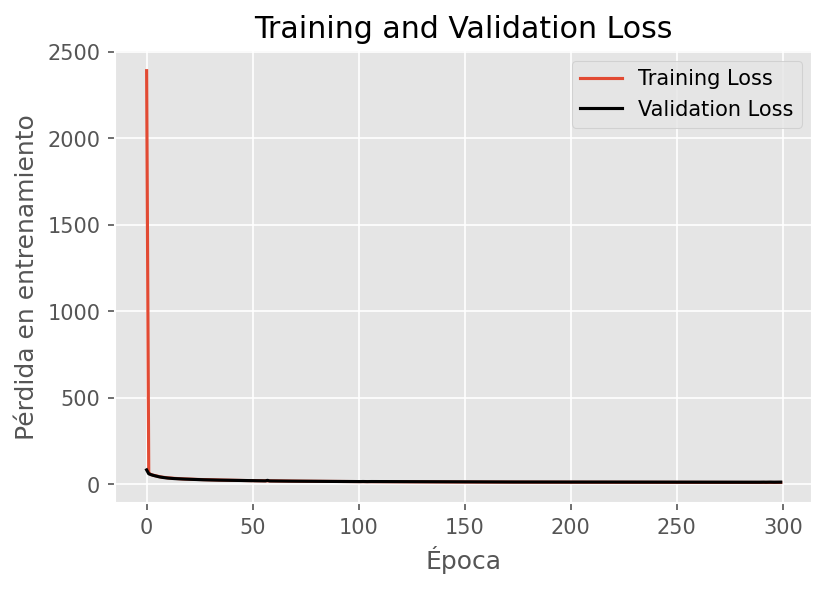

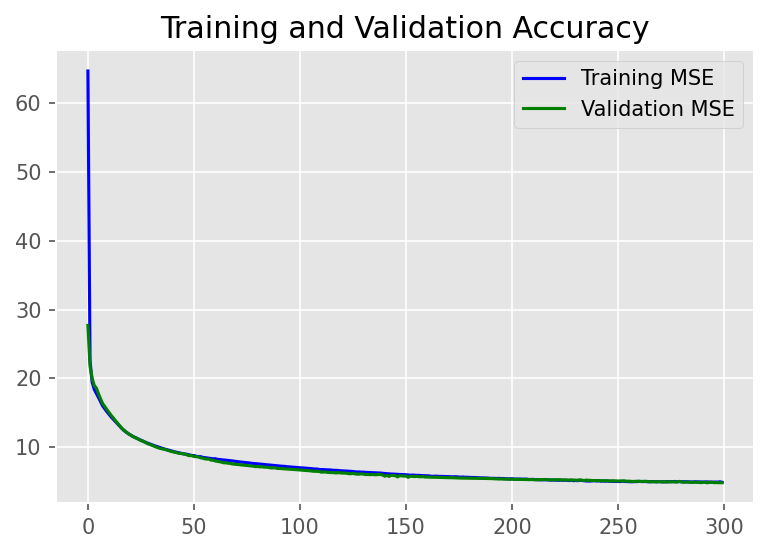

In [23]:
fig=plt.figure(dpi=150)
plt.plot(model_GRU.history.history["loss"],label='Training Loss')
plt.plot(model_GRU.history.history["val_loss"],'k',label='Validation Loss')
plt.legend()
plt.xlabel("Época"); plt.ylabel("Pérdida en entrenamiento")
plt.title('Training and Validation Loss')
plt.show()


fig=plt.figure(dpi=150)
epochs = range(1, len(model_GRU.history.history['mean_absolute_percentage_error']) +1)
plt.plot(model_GRU.history.history['mean_absolute_percentage_error'], 'b',label = 'Training MSE')
plt.plot(model_GRU.history.history['val_mean_absolute_percentage_error'], 'g', label = 'Validation MSE')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [24]:
keras_model_path = "C:/temp/model_GRU"
model_GRU.save(keras_model_path)

INFO:tensorflow:Assets written to: C:/temp/model_GRU\assets


INFO:tensorflow:Assets written to: C:/temp/model_GRU\assets


In [13]:
# model3.model.evaluate(dataset3Test)

In [14]:
# def xytest(dataset):  
#   for X, y in dataset.take(30):
#     X_test = X
#     y_test = y
#   return X_test,y_test

# def pred(model,X):
#   return model.predict(X)


In [15]:
# X_test3, y_test3 = xytest(dataset3Test)
# ypred3 = pred(model3.model,X_test3)
# ytest3= y_test3.numpy()

In [16]:
# # Plot the actual values
# fig=plt.figure(dpi=120)
# plt.plot(y_test3[15:25],color='c', label = 'actual')
# plt.plot(ypred3[15:25],color='green',label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()
# # Graph labels
# plt.xlabel('Muestra'); plt.ylabel('Humedad Relativad de Zona ME-304(%hr)'); plt.title('Actual y valores estimados por el Modelo 3');